## Algorithm Description: Mean Centering

### Motivation & Goal of Algorithm
###### What problem does the data have that requires this algorithm to fix it?

By visualizing a matrix of raw EEG data, the most obvious problem is that channel voltages are centered around vastly different values.

##### Loading the data...

In [1]:
%matplotlib inline
import cPickle as pkl
base = '../../data/'
path = 'bids_raw/sub-0001/ses-01/eeg/'
file_name = 'sub-0001_ses-01.pkl'
full_path = base + path + file_name
with open(full_path, 'rb') as f:
    D = pkl.load(f)
import numpy as np
import sys
sys.path.append('..')
from panda.methods import viz as viz
from panda import config
p_global = config.params['p_global']
eog_chans = np.array(p_global['eog_chans']) - 1
eeg_chans = np.setdiff1d(np.arange(128), eog_chans)
p_global.update({'eog_chans': eog_chans,
                'eeg_chans': eeg_chans})

p_global['plotting']['notebook'] = True

#### Visualizing the data...
##### Heatmaps

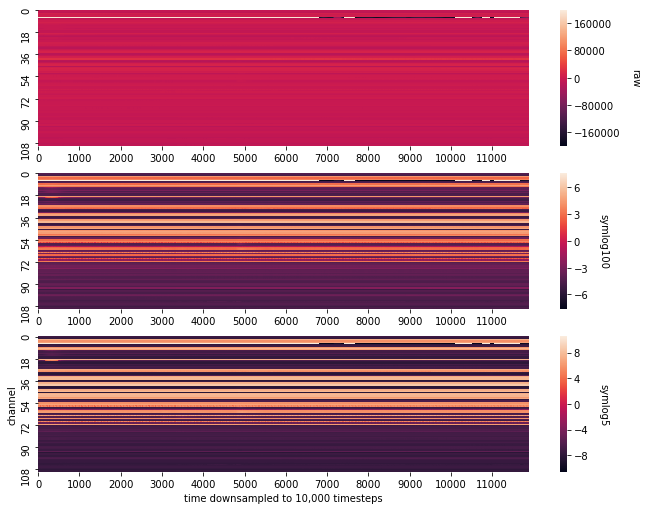

In [2]:
viz.heatmap(D, {'eog_in': True}, p_global)

Here, we can see that each channel takes on values which are centered around a different mean value, and these means are widely separated and take on physiologically impossible values. To fix this, we will do a simple mean centering of our data matrix.

### Setting
Consider a multidimensional time series with $C$ channels, where from each channel we sample $T$ timesteps. The mean vector of the channels can be found by the operation
$$
\hat{\mu} = \frac{1}{T} \sum_{i = 1}^T x_i 
$$
Where $x_i \in \mathbb{R}^C$ is a vector of observations for each channel at the timestep $i$.
#### Algorithm Pseudocode
There is nothing fancy here:


On input $M \in \mathbb{R}^{C \times T}$:
1. Calculate $\hat{\mu}_{M} = \frac{1}{T} \sum_{i = 1}^T M[:, i]$ 
2. return $M - \hat{\mu}_{M}$

#### Real Code
The code for this function is located in our [`panda.misc`](https://github.com/rmarren1/panda/blob/master/panda/methods/misc.py) package in the `setup` function.

### Application to Real Data
(because of the simplicity of this algorithm, we do not provide simulations to prove the correct functioning of this algorithm, as are usually provided).

##### Running the code

In [3]:
from panda.methods.misc import setup
(D_mc, p_local) = setup(D, {}, p_global)

##### Results and residuals

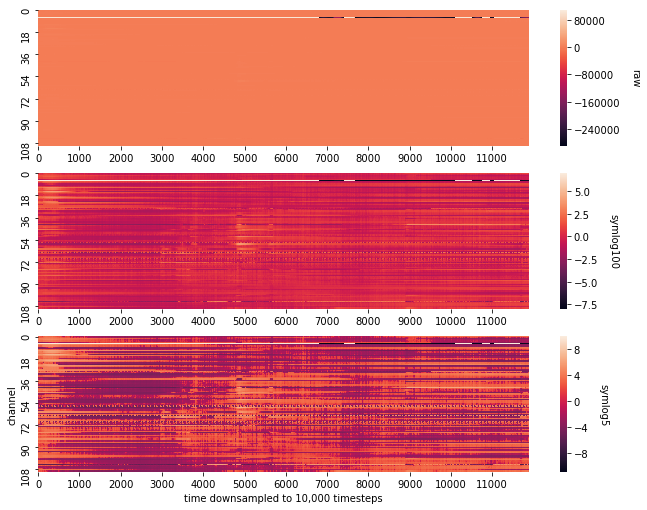

In [4]:
viz.heatmap(D_mc, {'eog_in': True}, p_global)

Values in this matrix look much more reasonable.

Below, we will also show the residual of this operation. This shows the difference between the mean centered and original data matrix. 

E.g., `D_mc - D`.

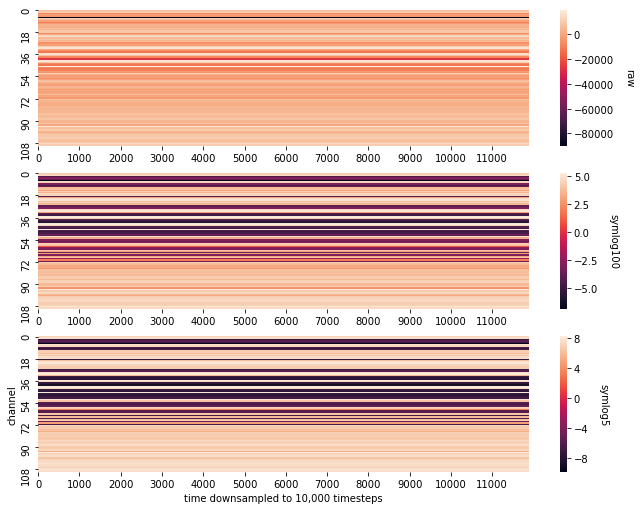

In [5]:
viz.heatmap((D_mc - D), {'eog_in': True}, p_global)

#### Results...
Here are the discriminibility results after running this function on an entire dataset...
![image](../results/bids_raw/disc-heat-_setup.png)
![image](../results/bids_raw/dists-setup.png)